IPython console for SymPy 1.3 (Python 3.7.5-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



Derivada respecto a $\alpha$

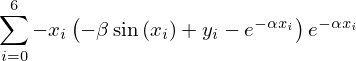

Derivada respecto a $\beta$

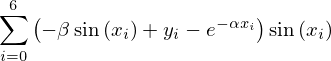

Sumatoria de la derivada respecto a $\alpha$

Sumatoria de la derivada respecto a $\beta$

In [59]:
import numpy as np
import pandas as pd
from numpy import polynomial
import sympy as sp
import scipy as sc
import scipy.integrate as integrate
from IPython.display import Markdown, Math, Latex
from pylab import *
from matplotlib import pyplot as plt

%matplotlib inline
sp.init_session(use_latex=True)
np.set_printoptions(suppress=True, linewidth=95, precision=8)

m, a, i, n, x, y, t, ti = symbols('m a i n x_i y_i t t_i')
alfa, beta = symbols('alpha beta')
# x = Function('x')(i)
# y = Function('y')(i)
xar = np.array([0., 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
yar = np.array([1.095, -0.1569, -1.0157, -1.4740, -1.3616, -0.8342, -0.0135])
derivada_alfa = Sum((y-(exp(-alfa*x)+beta*sin(x)))*(-x*exp(-alfa*x)), (i, 0, 6))
derivada_beta = Sum((y-(exp(-alfa*x)+beta*sin(x)))*sin(x), (i, 0, 6))
display(Markdown('Derivada respecto a $\\alpha$'))
display(derivada_alfa)
display(Markdown('Derivada respecto a $\\beta$'))
display(derivada_beta)
# display(err.doit())
suma1 = 0
suma2 = 0
for j in range(0, 7):
    suma1 = suma1 +(yar[j] - (exp(-alfa*xar[j]) + beta*sin(xar[j])))*(-xar[j]*exp(-alfa*xar[j]))
    suma2 = suma2 +(yar[j] - (exp(-alfa*xar[j]) + beta*sin(xar[j])))*(-xar[j]*sin(xar[j]))

display(Markdown('Sumatoria de la derivada respecto a $\\alpha$'))
display(expand(suma1))
display(Markdown('Sumatoria de la derivada respecto a $\\beta$'))
display(expand(suma2))  

xmatrix = Matrix([suma1, suma2])
ymatrix = Matrix([alfa, beta])
jacobiano = (xmatrix.jacobian(ymatrix))
# display(xmatrix.jacobian(ymatrix))
# print('tamaño jacobiano: ', len(jacobiano))
# print('tamaño suma1 : ', len(xmatrix))
# display(xmatrix[0].evalf(subs={alfa: 1, beta: 0}))
# display(xmatrix[1].evalf(subs={alfa: 1, beta: 0}))


In [22]:
def Newton_multi(F, J, x, tol):
    """
    Implementación del método de newton para un sistema no lineal.
    
    Argumentos:
        F   : matriz función
        J   : jacobiando de F
        x   : valores iniciales
        tol : precisión
    Devuelve:
        x   : matriz con la solución
        iteracion : número de iteraciones
        
    """
#     F_value = F(x)
    F_value = np.zeros((len(x)))
    J_value = np.zeros((len(x)))
    F_value[0] = float(F[0].evalf(subs={alfa: x[0], beta: x[1]}))
    F_value[1] = float(F[1].evalf(subs={alfa: x[0], beta: x[1]}))
    J_value = np.asarray(J.evalf(subs={alfa: x[0], beta: x[1]}), dtype=float)

#     F_value[0] = float(F[0].evalf(subs={x1: x[0], x2: x[1]}))
#     F_value[1] = float(F[1].evalf(subs={x1: x[0], x2: x[1]}))
#     J_value = np.asarray(J.evalf(subs={x1: x[0], x2: x[1]}), dtype=float)


#     print(F_value)
#     print(J_value)

    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteracion = 0
    while abs(F_norm) > tol and iteracion < 100:
#     while iteration_counter < 100:
        delta = np.linalg.solve(J_value, -F_value)
#         delta = -J_value/F_value
#         print('Delta: ', delta)
        xprev = x
        x = x + delta
#         print('x :', x)
#         F_value = x
        F_value[0] = float(F[0].evalf(subs={alfa: x[0], beta: x[1]}))
        F_value[1] = float(F[1].evalf(subs={alfa: x[0], beta: x[1]}))
        J_value = np.asarray(J.evalf(subs={alfa: x[0], beta: x[1]}), dtype=float)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteracion += 1

    return x, iteracion
   
piniciales = np.array([0, 0])
############
## Tests
# x1, x2 = symbols('x_1 x_2')
# f = Matrix([x1**2-x2**2+2*x2, 2*x1+x2**2-6])
# ym = Matrix([x1, x2])
# piniciales2= np.array([-4.6, -3.8])
# fx = Matrix([x1**2-x2**2+2*x2, 2*x1+x2**2-6])
# ym = Matrix([x1, x2])
# ja = f.jacobian(ym)
# Newton_multi(fx, ja, piniciales2, 1e-3)
############


solucion = Newton_multi(xmatrix, jacobiano, piniciales, 1e-8)

display(Markdown('**Solución del sistema:<br> $\\alpha$= {}<br> $\\beta$= {} <br>después de {} iteraciones**'.format(solucion[0][0], solucion[0][1], solucion[1])))
# xmatrix.evalf(subs={alfa: solucion[0][0], beta:solucion[0][1]})

**Solución del sistema:<br> $\alpha$= 0.464350992990676<br> $\beta$= -1.9463748805251841 <br>después de 9 iteraciones**

Coeficiente $q_1$

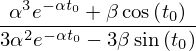

Coeficiente $p_0$

Coeficiente $p_1$

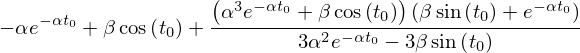

Coeficiente $p_2$

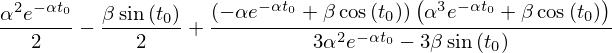

Padé:

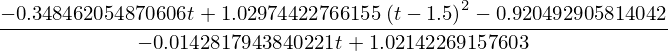

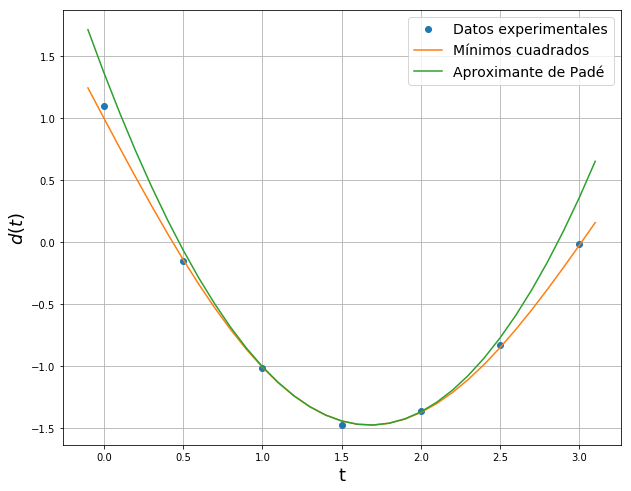

In [23]:
############################
## GRÁFICAS [apartado e)] ##
############################
a= solucion[0][0]
b = solucion[0][1]

plt.figure(figsize=(10, 8))
plt.xlabel('t', fontsize='18')
plt.ylabel('$d(t)$', fontsize='18')
plt.grid(True)
ejeY = arange(-0.1, 3.2, 0.1)

### Datos experimentales
t_exp = xar #= [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
dt_exp = yar #[1.095, -0.1569, -1.0157, -1.4740, -1.3616, -0.8342, -0.0135]
plt.plot(t_exp, dt_exp, 'o', label='Datos experimentales')

### Mínimos cuadrados
dt = exp(-a*t)+b*sin(t)
plt.plot(ejeY,[dt.evalf(subs={t:k}) for k in ejeY], label='Mínimos cuadrados')

### Padé
t0 = symbols('t_0')
q1 = (alfa**3*exp(-alfa*t0)+beta*cos(t0))/(3*(alfa**2*exp(-alfa*t0)-beta*sin(t0)))
display(Markdown('Coeficiente $q_1$'))
display(q1)
p0 = exp(-alfa*t0)+beta*sin(t0)
display(Markdown('Coeficiente $p_0$'))
display(p0)
p1 = (exp(-alfa*t0)+beta*sin(t0))*(alfa**3*exp(-alfa*t0)+beta*cos(t0))/(3*(alfa**2*exp(-alfa*t0)-beta*sin(t0)))-alfa*exp(-alfa*t0)+beta*cos(t0)
display(Markdown('Coeficiente $p_1$'))
display(p1)
p2 = (-alfa*exp(-alfa*t0)+beta*cos(t0))*(alfa**3*exp(-alfa*t0)+beta*cos(t0))/(3*(alfa**2*exp(-alfa*t0)-beta*sin(t0)))+((alfa**2*exp(-alfa*t0)-beta*sin(t0))/(2))
display(Markdown('Coeficiente $p_2$'))
display(p2)
numerador = p0.evalf(subs={t0: 1.5, alfa:a, beta:b})+p1.evalf(subs={t0: 1.5, alfa:a, beta:b})*(t-1.5)+p2.evalf(subs={t0: 1.5, alfa:a, beta:b})*(t-1.5)**2
denominador = 1+q1.evalf(subs={t0: 1.5, alfa:a, beta:b})*(t-1.5)
# Aproximante de Padé
app_pade = numerador/denominador
display(Markdown('Padé:'))
display(app_pade)

plt.plot(ejeY, [app_pade.evalf(subs={t:k}) for k in ejeY], label='Aproximante de Padé')

plt.legend(loc='best', fontsize='14')

plt.savefig('apartado_e.png')

In [58]:
"""
Apartado d)
    Utilizando el criterio de la matriz hessiana se intenta demostrar que los valores 
    de alfa y beta encontrados generar un error mínimo
"""

err_cuadratico = (y-(exp(-alfa*x)+beta*sin(x)))**2
display(err_cuadratico)

d_a = diff(err_cuadratico, alfa)
d_b = diff(err_cuadratico, beta)
d_aa = diff(d_a, alfa)
d_ab = diff(d_a, beta)
d_bb = diff(d_b, beta)
d_ba = diff(d_b, alfa)
display('d_a')
display(d_a)
display('d_b')
display(d_b)
display('d_aa')
display(d_aa)
display('d_bb')
display(d_bb)
display('d_ab')
display(d_ab)
display('d_ba')
display(d_ba)

h = d_aa * d_bb - d_ab**2
display('Base hessiano')
display(h)
sumah = 0
for j in range(0, 7):
            ##−4𝑥2𝑖𝑒−2𝛼𝑥𝑖sin2(𝑥𝑖)+2(−2𝑥2𝑖(−𝛽sin(𝑥𝑖)+𝑦𝑖−𝑒−𝛼𝑥𝑖)𝑒−𝛼𝑥𝑖+2𝑥2𝑖𝑒−2𝛼𝑥𝑖)sin2(𝑥𝑖)
    sumah += -4*xar[j]**2*exp(-2*alfa*xar[j])*(sin(xar[j]))**2+2*(-2*(xar[j])**2*(-beta*sin(xar[j])+yar[j]-exp(-alfa*xar[j]))*exp(-alfa*xar[j])+2*xar[j]**2*exp(-2*alfa*xar[j]))*(sin(xar[j]))**2

display('Valor del hessiano')
display(sumah.evalf(subs={alfa:solucion[0][0], beta:solucion[0][1]}))
sumad_aa = 0
for j in range(0, 7):
    sumad_aa += -2*xar[j]**2*exp(-alfa*xar[j])*(-beta*sin(xar[j])+yar[j]-exp(-alfa*xar[j]))+2*xar[j]**2*exp(-2*alfa*xar[j])

display("Segunda derivada respecto a alfa")
display(sumad_aa.evalf(subs={alfa:solucion[0][0], beta:solucion[0][1]}))

# display(Markdown('__Hessiano: __'))
# display(Markdown('Hessiano: '))
# display(h)
# display('valor hessiano')
# valorh = h.evalf(subs={alfa: solucion[0][0], beta: solucion[0][1]})
# display(valorh)

# if suma12 == suma21:
#     print("Iguales")

'd_a'

'd_b'

'd_aa'

'd_bb'

'd_ab'

'd_ba'

'Base hessiano'

'Valor del hessiano'

'Segunda derivada respecto a alfa'

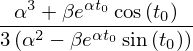

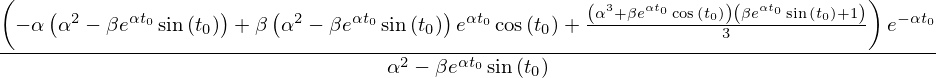

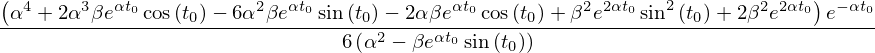

In [5]:
display(simplify(q1))
display(simplify(p1))
display(simplify(p2))

display(p1.evalf(subs={t0:1.5, alfa:a, beta:b})*t)

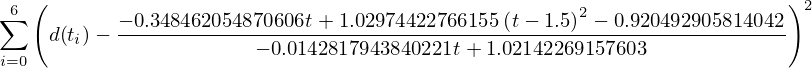

**Error cuadrático para el aproximante de Padé:**

In [6]:
"""
Error cuadrático para el aproximante de Padé
"""
d = Function('d')(ti)
err_pade = Sum((d-app_pade)**2, (i, 0, 6))
display(err_pade)
error = 0
for j in range(0,6):
    error += (yar[j]-app_pade.evalf(subs={t: xar[j]}))**2
display(Markdown('**Error cuadrático para el aproximante de Padé:**'))
display(error)

In [7]:
"""
Error cuadrático para mínimos cuadrados
"""
error_cuadratico = 0
for j in range(0, 6):
    error_cuadratico += (yar[j]-(exp(-a*xar[j])+b*sin(xar[j])))**2

display(Markdown('**Error cuadrático para mínimos cuadrados:**'))
display(error_cuadratico)

**Error cuadrático para mínimos cuadrados:**

**Polinomio de Taylor para $t_0$ genérico:**

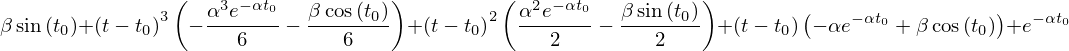

**Polinomio de Taylor para $t_0=1.5$, $\alpha=0.464350992990676$ y $\beta=-1.9463748805251841$:**

In [8]:
"""
Apartado g): polinomio de Taylor para un t0
arbitrario y particularización para t0=1,5 y
valores alfa y beta calculados.
"""

x = symbols('x')
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)
def taylor(function,x0,n):
    j = 0
    p = 0
    while j <= n:
        p = p + (function.diff(t,j).subs(t, x0))/(factorial(j))*(t-x0)**j
        j += 1
    return p
p_taylor_numerico = exp(-a*t)+b*sin(t)
pol_numerico = taylor(p_taylor_numerico, 1.5, 3)

p_taylor_simbolico = exp(-alfa*t)+beta*sin(t)
pol_simbolico = taylor(p_taylor_simbolico, t0, 3)

display(Markdown('**Polinomio de Taylor para $t_0$ genérico:**'))
display(pol_simbolico)
display(Markdown('**Polinomio de Taylor para $t_0=1.5$, $\\alpha={}$ y $\\beta={}$:**'.format(a, b)))
display(pol_numerico)


In [75]:
"""
Error cuadrático para polinomio de Taylor
"""
error_cuadratico_taylor = 0
error_cuadratico_medio_taylor = 0
for j in range(0, 6):
    error_cuadratico_taylor += ((yar[j]-(-0.369073340410837*xar[j]+
                               0.0146313155672225*(xar[j]-1.5)**3+
                               1.02447319810118*(xar[j]-1.5)**2-0.889575977503696)))**2

error_cuadratico_medio_taylor = error_cuadratico_taylor/len(xar)

display(Markdown('**Error cuadrático para el polinomio de Taylor:**'))
display(error_cuadratico_taylor)
display(Markdown('**Error cuadrático medio para el polinomio de Taylor:**'))
display(error_cuadratico_medio_taylor)
error_cuadratico2 = 0
tayl = ((yar[j]-(-0.369073340410837*x+
                               0.0146313155672225*(x-1.5)**3+
                               1.02447319810118*(x-1.5)**2-0.889575977503696)))**2
def integrand(x):
    return ((yar[j]-(-0.369073340410837*x+
                               0.0146313155672225*(x-1.5)**3+
                               1.02447319810118*(x-1.5)**2-0.889575977503696)))**2
error_integral = sc.integrate.quad(integrand, 0, 3)
display(error_integral)

**Error cuadrático para el polinomio de Taylor:**

**Error cuadrático medio para el polinomio de Taylor:**

<IPython.core.display.Math object>

**Función de error para Taylor**

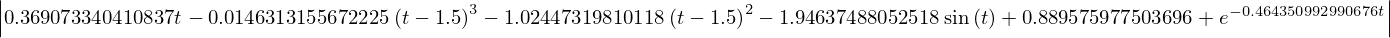

**Función de error para Padé**

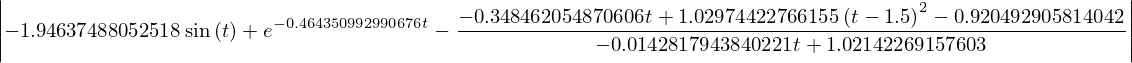

,t,$E= |D(t)-P_3(t)|$,$E= |D(t)-r(t)|$
0,-0.1,0.468209529289515,0.469548384967562
1,0.0,0.366108028184578,0.367143708418873
2,0.1,0.281022566726020,0.281809577107221
3,0.2,0.211197271727935,0.211783207813833
4,0.3,0.154891229049294,0.155317230612237
5,0.4,0.110397890184693,0.110699098652581
6,0.5,0.0760640839949997,0.0762701031128188
7,0.6,0.0503084459552475,0.0504438056943928
8,0.7,0.0316390830110930,0.0317237067540045
9,0.8,0.0186702996715268,0.0187199746994167


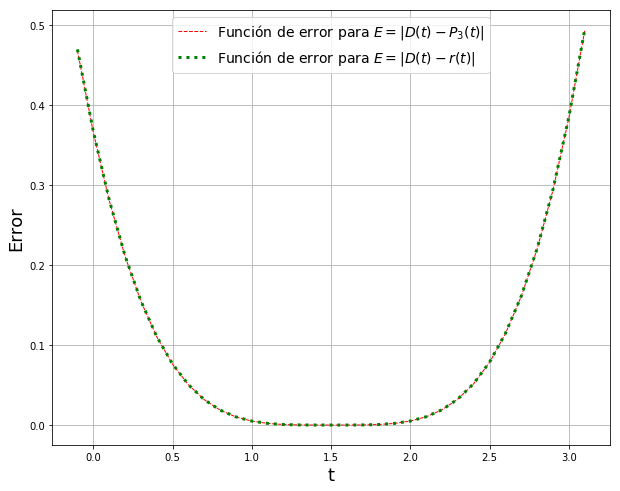

In [10]:
"""
Funciones de error apartado g)
    - Función de error D(t)-P(t=1.5)
    - Función de error D(t)-r(t=1.5)
"""
pade_coord=[]
taylor_coord = []

display(Math('D(t)={}'.format(dt)))

ferror_dt_pt = abs(dt - pol_numerico)
ferror_dt_rt = abs(dt - app_pade)

display(Markdown('**Función de error para Taylor**'))
display(ferror_dt_pt)
display(Markdown('**Función de error para Padé**'))
display(ferror_dt_rt)

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.xlabel('t', fontsize='18')
plt.ylabel('Error', fontsize='18')

plt.plot(ejeY, [abs(ferror_dt_pt.evalf(subs={t:j})) for j in ejeY], 'r--', label='Función de error para $E= |D(t)-P_3(t)|$', linewidth="1")
plt.plot(ejeY, [abs(ferror_dt_rt.evalf(subs={t:j})) for j in ejeY], 'g:', label='Función de error para $E= |D(t)-r(t)|$', linewidth="3")
plt.legend(loc='best', fontsize='14')
plt.savefig('apartado_g.png')

[taylor_coord.append(abs(ferror_dt_pt.evalf(subs={t:j}))) for j in ejeY]

[pade_coord.append(abs(ferror_dt_rt.evalf(subs={t:j}))) for j in ejeY]

tabla = pd.DataFrame({
                        't':ejeY,
                        '$E= |D(t)-P_3(t)|$':taylor_coord,
                        '$E= |D(t)-r(t)|$': pade_coord
})
tabla.to_latex('apartado_g.tex')
display(tabla)

**Funciones de error:**

Función de error para $t_0=1.0$

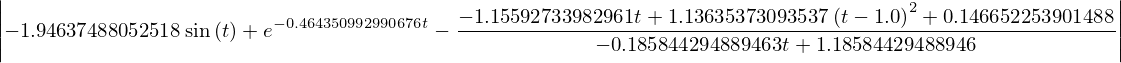

Función de error para $t_0=1.5$

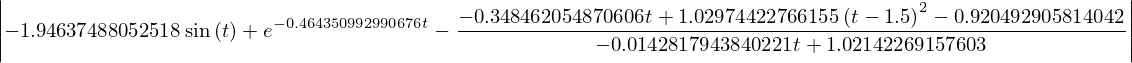

Función de error para $t_0=2.0$

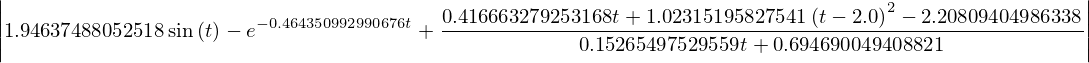

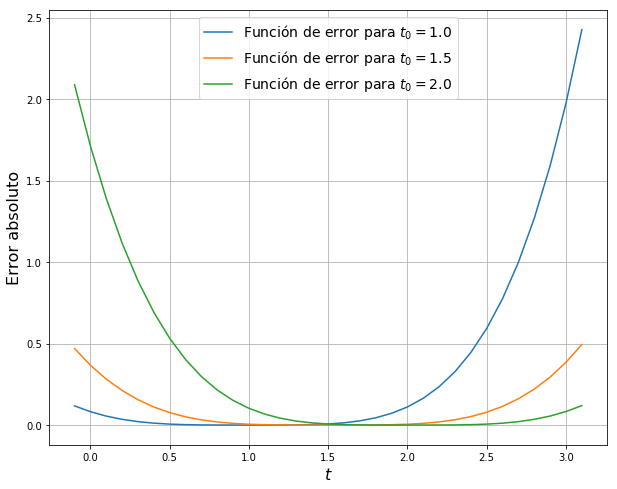

In [11]:
"""
Apartado f):
    - Error absoluto entre D(t) y el aproximante de Padé en t0=1.0, 1.5 y 2.0
    - Gráfica de los errores         
"""

### t_0 = 1.0
# display(ferror_dt_rt)
display(Markdown('**Funciones de error:**'))
display(Markdown('Función de error para $t_0=1.0$'))
numerador1 = p0.evalf(subs={t0: 1.0, alfa:a, beta:b})+p1.evalf(subs={t0: 1.0, alfa:a, beta:b})*(t-1.0)+p2.evalf(subs={t0: 1.0, alfa:a, beta:b})*(t-1.0)**2
denominador1 = 1+q1.evalf(subs={t0: 1.0, alfa:a, beta:b})*(t-1.0)
pade_10 = numerador1/denominador1
ferror_10 = abs(dt-pade_10)
display(ferror_10)

display(Markdown('Función de error para $t_0=1.5$'))
numerador15 = p0.evalf(subs={t0: 1.5, alfa:a, beta:b})+p1.evalf(subs={t0: 1.5, alfa:a, beta:b})*(t-1.5)+p2.evalf(subs={t0: 1.5, alfa:a, beta:b})*(t-1.5)**2
denominador15 = 1+q1.evalf(subs={t0: 1.5, alfa:a, beta:b})*(t-1.5)
pade_15 = numerador15/denominador15
ferror_15 = abs(dt-pade_15)
display(ferror_15)

display(Markdown('Función de error para $t_0=2.0$'))
numerador20 = p0.evalf(subs={t0: 2.0, alfa:a, beta:b})+p1.evalf(subs={t0: 2.0, alfa:a, beta:b})*(t-2.0)+p2.evalf(subs={t0: 2.0, alfa:a, beta:b})*(t-2.0)**2
denominador20 = 1+q1.evalf(subs={t0: 2.0, alfa:a, beta:b})*(t-2.0)
pade_20 = numerador20/denominador20
ferror_20 = abs(dt-pade_20)
display(ferror_20)

#############
## Gráfica ##
#############



plt.figure(figsize=(10, 8))
plt.grid(True)

plt.xlabel('$t$', fontsize='16')
plt.ylabel('Error absoluto', fontsize='16')

plt.plot(ejeY, [ferror_10.evalf(subs={t:j}) for j in ejeY], label='Función de error para $t_0=1.0$')
plt.plot(ejeY, [ferror_15.evalf(subs={t:j}) for j in ejeY], label='Función de error para $t_0=1.5$')
plt.plot(ejeY, [ferror_20.evalf(subs={t:j}) for j in ejeY], label='Función de error para $t_0=2.0$')

plt.legend(loc='best', fontsize='14')

plt.savefig('apartado_f.png')

